# PS1-5 Locally Weighted Linear Regression

## b. Coding Problem

### 1. Import Library

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import CS229.cs229_learning.problem_sets.PS1.src.util as util
from CS229.cs229_learning.problem_sets.PS1.src.linear_model import LinearModel

### 2. Load Dataset

In [2]:
x_train, y_train = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds5_train.csv', add_intercept=True) #add_intercept = them cot x0 = 1
x_valid, y_valid = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds5_valid.csv', add_intercept=True)
x_test, y_test = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds5_test.csv', add_intercept=True)

### 3. Plot the Traning set

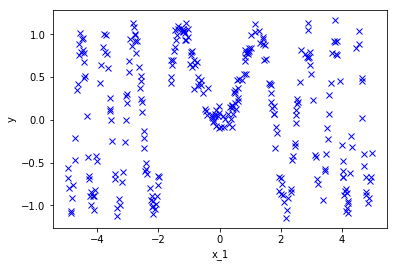

In [3]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.plot(x_train[:, -1], y_train, 'bx', linewidth=2) #x[:, -1] = ":" - choose all row but & "-1" - choose the last column
plt.show()

### 4. Impement Locally Linear Regression

In [4]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.
        :param x: Training example inputs. X has shape (m ,n)
        :param y: Traning example labels. Y has shape (m,)
        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).
            x_predict: Predict point has shape (1, n)
        Returns:
            Outputs of shape (m,1).
        """
        # *** START CODE HERE ***

        #1. Get the shape of the Dataset
        m, n = x.shape

        #2. Implement the LWR formula
        w_vector = np.exp(- np.linalg.norm(self.x - np.reshape(x, (m ,-1, n)), ord=2, axis=2)**2 / (2 * self.tau**2)) #w_vector.shape = (m,m) with each column is w of each training dataset
                                                                                                                        # => need cho convert each column of w_vector to diagonal matrix

        #3. Turn the weights into diagonal matrices, each corresponds to a single input. Shape (m, m, m)
        w = np.apply_along_axis(np.diag, axis=1, arr=w_vector) #axis = 1 = column

        #4. Compute theta for each input x^(i). Theta.shape (m, n)
        theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y

        #5.
        answer = np.einsum('ij,ij->i', x, theta)

        return answer
        # *** END CODE  HERE ***

### 5. Training the Model

In [5]:
clf = LocallyWeightedLinearRegression(tau = 0.5)
clf.fit(x_train, y_train)

### 6. Predict Phase

In [6]:
y_valid_pred = clf.predict(x_valid)

### 7. Report MSE

In [7]:
def mean_square_error(y_true, y_pred, m):
    diff = 0
    for i in range(0, m):
        diff += (y_true[i] - y_pred[i])**2
    return (diff / m)

In [8]:
# Number of dataset
m_valid = y_valid.size
#MSE between
mse_valid = mean_square_error(y_valid, y_valid_pred, m_valid)
print("VALID: Mean Square Error (MSE): ", mse_valid)

VALID: Mean Square Error (MSE):  0.3305312682137527


### 8. Plot model prediction

In [9]:
def compare_plot(x, y_label, y_pred, graph_title):
    plt.figure()
    #plot training set
    plt.plot(x[:, -1], y_label, 'bx', linewidth=2, label='label')
    #plot predict data
    plt.plot(x[:, -1], y_pred, 'ro', linewidth=2, label='predict')
    #title of graph
    plt.title(graph_title, fontsize=20)
    plt.legend(loc='upper left')


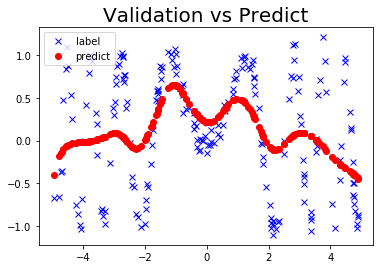

In [10]:
compare_plot(x_valid, y_valid, y_valid_pred, "Validation vs Predict")

## c. Coding Problem

### 1. Tau list

In [11]:
tau_list = np.array([3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1])

### 2. Plot Actual vs Predict with each Tau

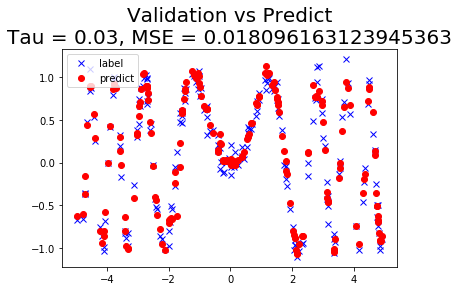

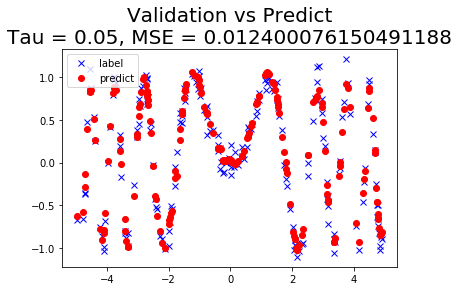

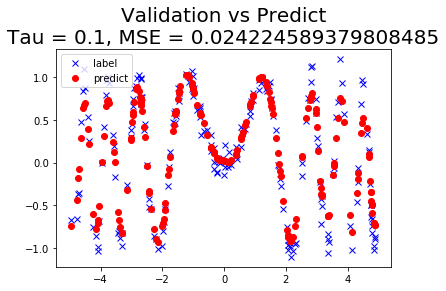

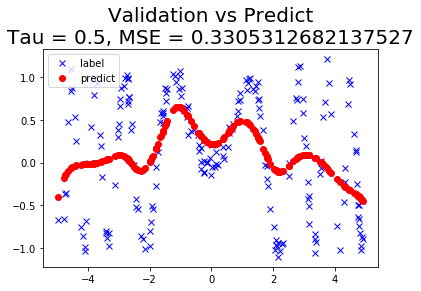

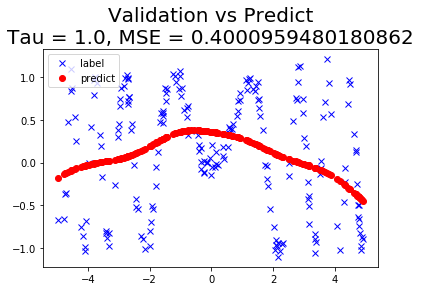

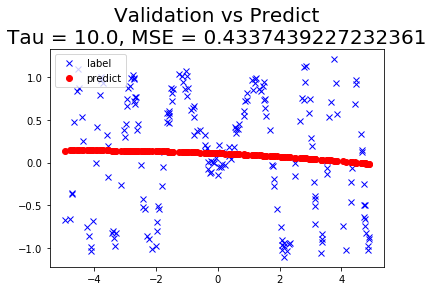

In [12]:
#Best Tau = Min MSE
mse_min = math.inf
best_tau = 0
for t in tau_list:
    #set up model with tau value
    clf = LocallyWeightedLinearRegression(tau = t)
    #training
    clf.fit(x_train, y_train)
    #validation
    y_valid_pred = clf.predict(x_valid)
    #calculate mse
    m_valid = y_valid.size
    mse = mean_square_error(y_valid, y_valid_pred, m_valid)
    if(mse < mse_min):
        mse_min = mse
        best_tau = t

    #Plot
    compare_plot(x_valid, y_valid, y_valid_pred, f"Validation vs Predict\nTau = {t}, MSE = {mse}")

In [13]:
print(f"The bese tau is: t = {best_tau}, which make MSE min is {mse_min}")

The bese tau is: t = 0.05, which make MSE min is 0.012400076150491188


### 3. Report MSE on test split with best Tau of valid split

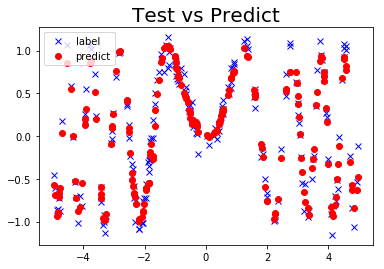

In [14]:
#Train
clf = LocallyWeightedLinearRegression(tau = best_tau)
clf.fit(x_train, y_train)
#Predict in Test
y_test_pred = clf.predict(x_test)
#Calculate test MSE
m_test = y_test.size
mse_test = mean_square_error(y_test, y_test_pred, m_test)
#plot
compare_plot(x_test, y_test, y_test_pred, "Test vs Predict")

In [15]:
#MSE
print("MSE test: ", mse_test)

MSE test:  0.016990143386886102
